In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('extracted_features.csv')

In [7]:
df.head()

,file_name,mfcc_mean_0,mfcc_mean_1,mfcc_mean_2,mfcc_mean_3,mfcc_mean_4,mfcc_mean_5,mfcc_mean_6,mfcc_mean_7,mfcc_mean_8,...,chroma_3,chroma_4,chroma_5,chroma_6,chroma_7,chroma_8,chroma_9,chroma_10,chroma_11,label
0,pop.00027.wav,-75.463326,83.299210,10.706215,14.456715,14.260171,7.435577,5.284629,-0.401441,5.719382,...,0.325283,0.341221,0.313170,0.443056,0.400414,0.339016,0.419027,0.372709,0.422149,pop
1,pop.00033.wav,-69.112465,73.778976,-12.471774,9.525619,-0.051146,12.708080,3.162070,-0.102521,2.513747,...,0.337867,0.390890,0.429020,0.447938,0.532196,0.404587,0.419261,0.354290,0.476581,pop
2,pop.00032.wav,-113.258118,41.564148,21.545959,11.081444,17.457850,0.624119,3.016761,0.067581,3.470428,...,0.478151,0.477023,0.344526,0.388563,0.403329,0.491917,0.383729,0.390939,0.451360,pop
3,pop.00026.wav,-73.421997,97.422211,16.888651,-0.552833,7.178626,4.888375,0.737000,-5.553925,0.964399,...,0.246380,0.323797,0.267226,0.250600,0.542449,0.391026,0.345556,0.244526,0.342496,pop
4,pop.00030.wav,-18.320768,72.323654,-4.790904,-0.324024,1.718131,-0.866143,-1.290872,-0.335301,0.625273,...,0.371932,0.260325,0.373052,0.257145,0.290357,0.469181,0.320809,0.440710,0.283835,pop


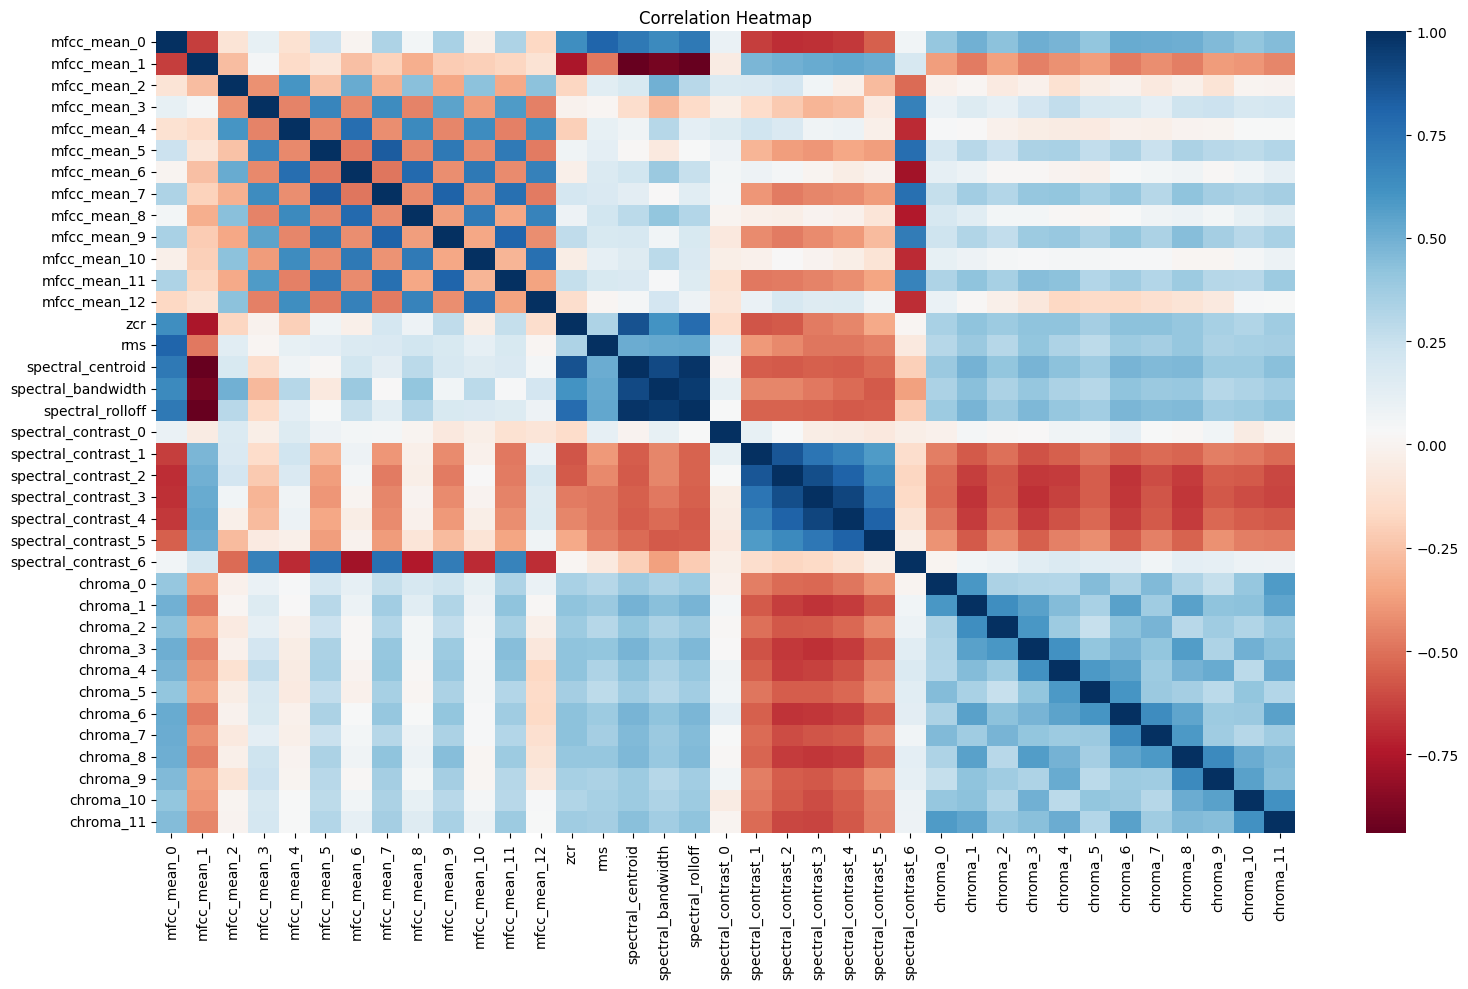

In [19]:
df_numeric = df.select_dtypes(include='number')  # Keep only numeric columns
df_filtered = df_numeric.loc[:, ~df_numeric.columns.str.contains('std')]  # Exclude "std" columns

# Compute the correlation matrix
correlation_matrix = df_filtered.corr()

# Plot the correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=False, cmap="RdBu", cbar=True)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


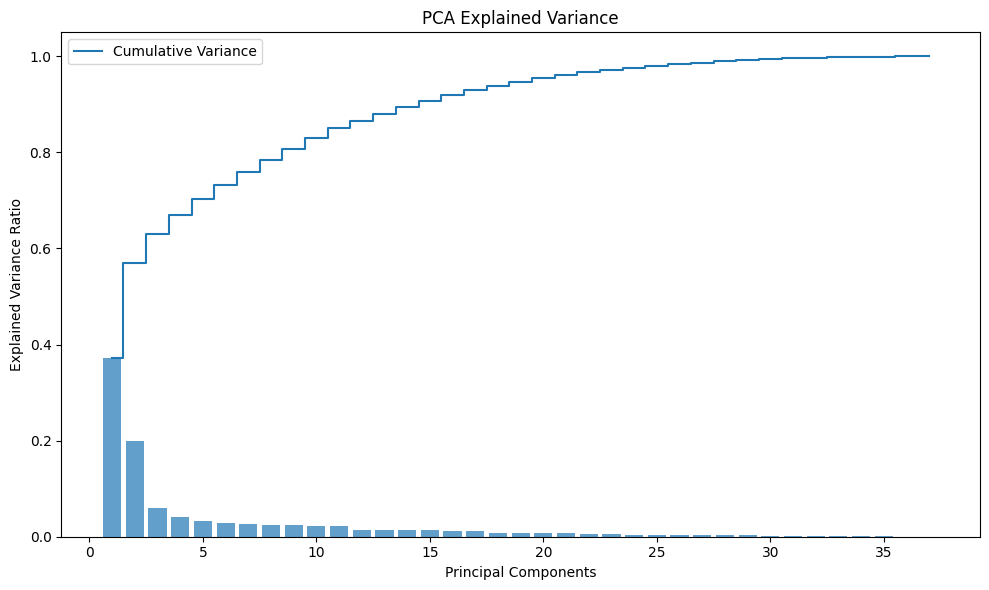

        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.508469 -3.855137  0.427175  0.522630  0.536180  0.118775 -0.774996   
1 -1.937918 -3.310616  0.518449 -1.370839  0.674294 -0.397384  0.248642   
2 -3.036534 -5.454842  2.289329 -0.784300 -1.237227 -0.524324  0.213544   
3  1.224677 -3.611164  1.513205  0.538583  0.543402 -0.020681 -0.673949   
4 -0.751774 -4.036549  2.041658 -1.056561 -0.341889  0.236469 -1.544277   

        PC8       PC9      PC10  ...      PC28      PC29      PC30      PC31  \
0 -0.301997 -0.109905 -0.092917  ... -0.144997 -0.287579  0.175983  0.205643   
1  1.039128 -0.487805  0.231985  ... -0.314339 -0.303152  0.020258  0.152045   
2 -0.608485 -0.976540 -1.521747  ...  0.302647  0.557609  0.664694  0.367092   
3  0.823521  0.423409  0.929120  ...  0.502126 -0.435762  0.180645  0.148092   
4  0.618812 -1.012947  1.000085  ...  0.197971 -0.029595  0.058581  0.163543   

       PC32      PC33      PC34      PC35      PC36      PC37  
0 -0

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_filtered)
pca = PCA()
principal_components = pca.fit_transform(data_scaled)

# Create a DataFrame for the principal components
pca_df = pd.DataFrame(
    data=principal_components,
    columns=[f"PC{i+1}" for i in range(principal_components.shape[1])]
)

# Explained variance ratio (importance of each PC)
explained_variance = pca.explained_variance_ratio_

# Plot the explained variance ratio
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance) + 1), explained_variance.cumsum(), where='mid', label='Cumulative Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('PCA Explained Variance')
plt.legend(loc='best')
plt.tight_layout()
plt.show()


print(pca_df.head())